# Decoding Heart Disease: Exploring the Validity of Key Risk Indicators

Heart disease is a leading cause of mortality worldwide and has been linked to several key risk factors, including high blood pressure, high cholesterol, smoking, diabetes, obesity, physical inactivity, and alcohol consumption. While these risk factors are well-established in medical literature, it is important to assess their relevance as accurate indicators for heart disease. As such, this project aims to perform exploratory data analysis (EDA) on the Personal Key Indicators of Heart Disease dataset to investigate the relationship between the included variables and their correlation with heart disease.

The Personal Key Indicators of Heart Disease dataset contains information on several variables including BMI, smoking status, alcohol consumption, physical and mental health, difficulty with walking, age, race, diabetic status, physical activity, general health, sleep time, asthma, and kidney disease. The objective of this project is to conduct EDA on this dataset to determine whether these variables are true indicators of heart disease.


### Objective Question:

* Are there patterns or relationships between certain key indicators and the risk of heart disease?

* Is there a significant difference in the key indicators between patients with and without heart disease?

* Which key indicators have the strongest association with the risk of heart disease?

* Are there any unexpected or surprising findings in the data that challenge commonly accepted beliefs about the risk factors for heart disease?


### Dataset Description

* HeartDisease: Self-reported history of heart disease.
* BMI: Body Mass Index of a person.
* Smoking: Lifetime smoking status.
* AlcoholDrinking: Heavy alcohol consumption.
* Stroke: Self-reported history of stroke.
* PhysicalHealth: Number of days in the past 30 days where physical health was not good.
* MentalHealth: Number of days in the past 30 days where mental health was not good.
* DiffWalking: Self-reported serious difficulty walking or climbing stairs.
* Sex: Self-reported gender.
* AgeCategory: Age category in 14 levels.
* Race: Self-reported race/ethnicity value.
* Diabetic: Self-reported history of diabetes.
* PhysicalActivity: Physical activity or exercise during the past 30 days other than regular job.
* GenHealth: Self-reported general health.
* SleepTime: Average hours of sleep per 24-hour period.
* Asthma: Self-reported history of asthma.
* KidneyDisease: Self-reported history of kidney disease.
* SkinCancer: Self-reported history of skin cancer.


In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from IPython.core.display import HTML
import seaborn as sns

def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

### Quick view

In [32]:
df = pd.read_csv('heart_2020.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [33]:
print(f'Number of rows: {df.shape[0]};  Number of columns: {df.shape[1]}')
print(f'No of missing values: {sum(df.isna().sum())}')
df.isnull().any()

Number of rows: 319795;  Number of columns: 18
No of missing values: 0


HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [34]:
# Data types
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [35]:
# Count of unique values in each column
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

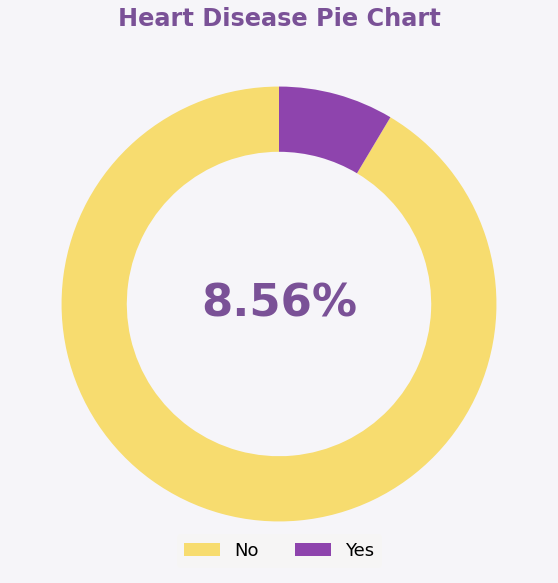

In [36]:
plt.subplots(figsize=(25, 10), facecolor='#f6f5f9')
plt.pie(df.HeartDisease.value_counts(), wedgeprops={'width':0.3}, startangle=90, colors=['#F7DC6F', '#8E44AD'])
plt.title('Heart Disease Pie Chart', fontsize=24, color='#7A5197', fontweight='bold')
plt.text(0, 0, f"{df.HeartDisease.value_counts()[1] / df.HeartDisease.count() * 100:.2f}%", ha='center', va='center', fontweight='bold', fontsize=45, color='#7A5197')
plt.legend(df.HeartDisease.value_counts().index, ncol=2, facecolor='#f6f5f5', edgecolor='#f6f5f5', loc='lower center', fontsize=18)
plt.show()

We are dealing with the highly imbalanced dataset where only 8.56% people have heart disease.

In [37]:
# Statistics of Numerical features
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


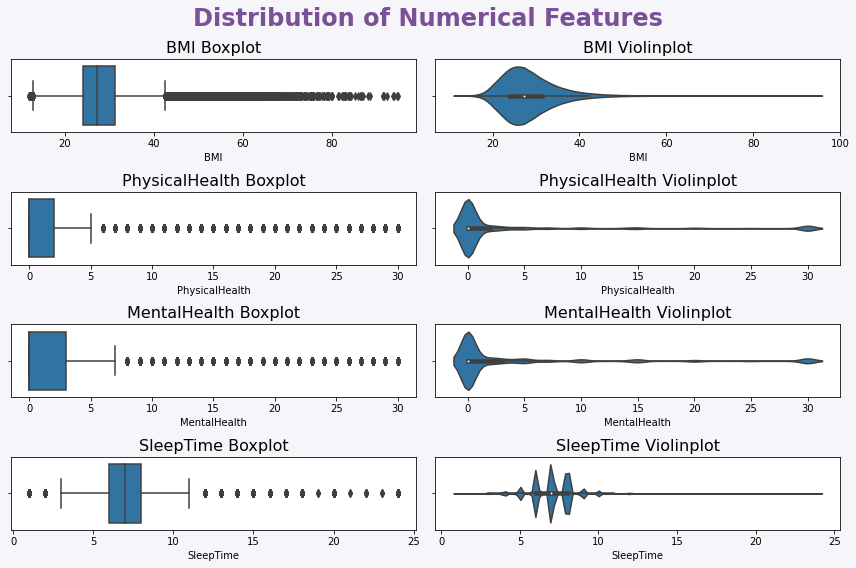

In [38]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(12, 8), facecolor='#f6f5f9')
numeric_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Loop over the numeric features and plot boxplots and violinplots
for i, col in enumerate(numeric_features):
    sns.boxplot(x=df[col], ax=axis[i][0])
    sns.violinplot(x=df[col], ax=axis[i][1])

    # Set the title for each row
    axis[i][0].set_title(f"{col} Boxplot", fontsize=16)
    axis[i][1].set_title(f"{col} Violinplot", fontsize=16)

fig.suptitle("Distribution of Numerical Features", fontsize=24, color='#7A5197', fontweight='bold')
plt.tight_layout()

By looking at the statistical summary and plots of the numerical features, we can see that the average BMI is 28.32, which falls within the overweight category. However, it's important to note that the dataset is highly imbalanced and being overweight doesn't necessarily mean a person has heart disease.

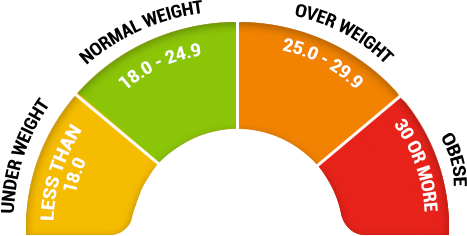

Regarding physical health, the average number of days in the past 30 where individuals reported not feeling well is 3. This value is highly skewed, with the majority of people reporting zero days. The maximum value of 30 indicates that some individuals may be experiencing chronic health issues.

Similarly, for mental health, the average number of days in the past 30 where individuals reported not feeling well is 4. This value is also highly skewed towards the right, with the majority of people reporting zero or very few bad days.

Finally, the average amount of sleep reported by individuals is around 7 hours a day. However, the maximum reported value of 24 hours raises some doubts about the accuracy of this data point.

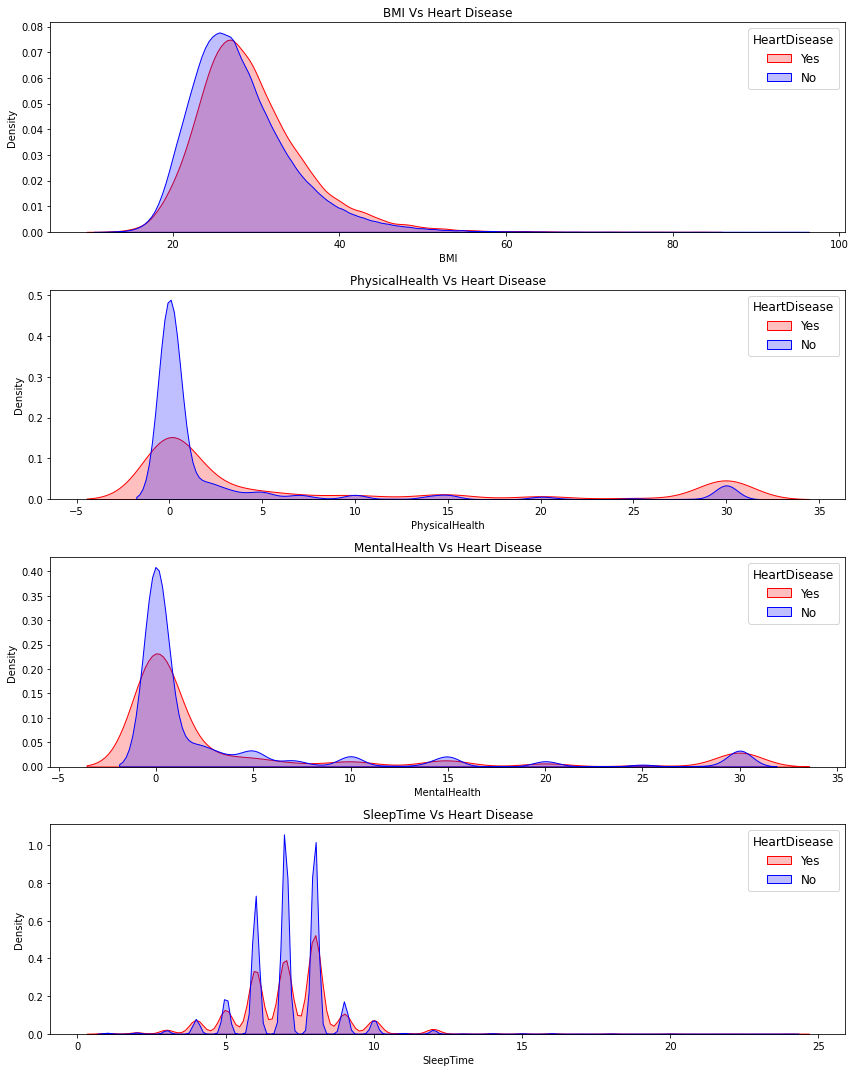

In [39]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 15))
axs = axs.flatten()

for i, col in enumerate(numeric_features):
    sns.kdeplot(df.loc[(df['HeartDisease']=='Yes'), col], color='r', fill=True, label='Yes', ax=axs[i])
    sns.kdeplot(df.loc[(df['HeartDisease']=='No'), col], color='b', fill=True, label='No', ax=axs[i])
    axs[i].set_title(f'{col} Vs Heart Disease')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Density')
    axs[i].legend(title='HeartDisease', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()


From the visualizations, it is evident that the distribution of BMI for individuals with and without HeartDisease is overlapping. Therefore, it can be concluded that being overweight is not necessarily indicative of having heart disease. The plot also indicates that people with heart disease are found to have slightly higher BMI than people with no heart disease. Instead, PhysicalHealth and MentalHealth appear to be better indicators of the presence of heart disease. Furthermore, the plot of SleepTime suggests that whether a person follows a regular sleep pattern or not, they are equally prone to developing heart disease.

In [40]:
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']

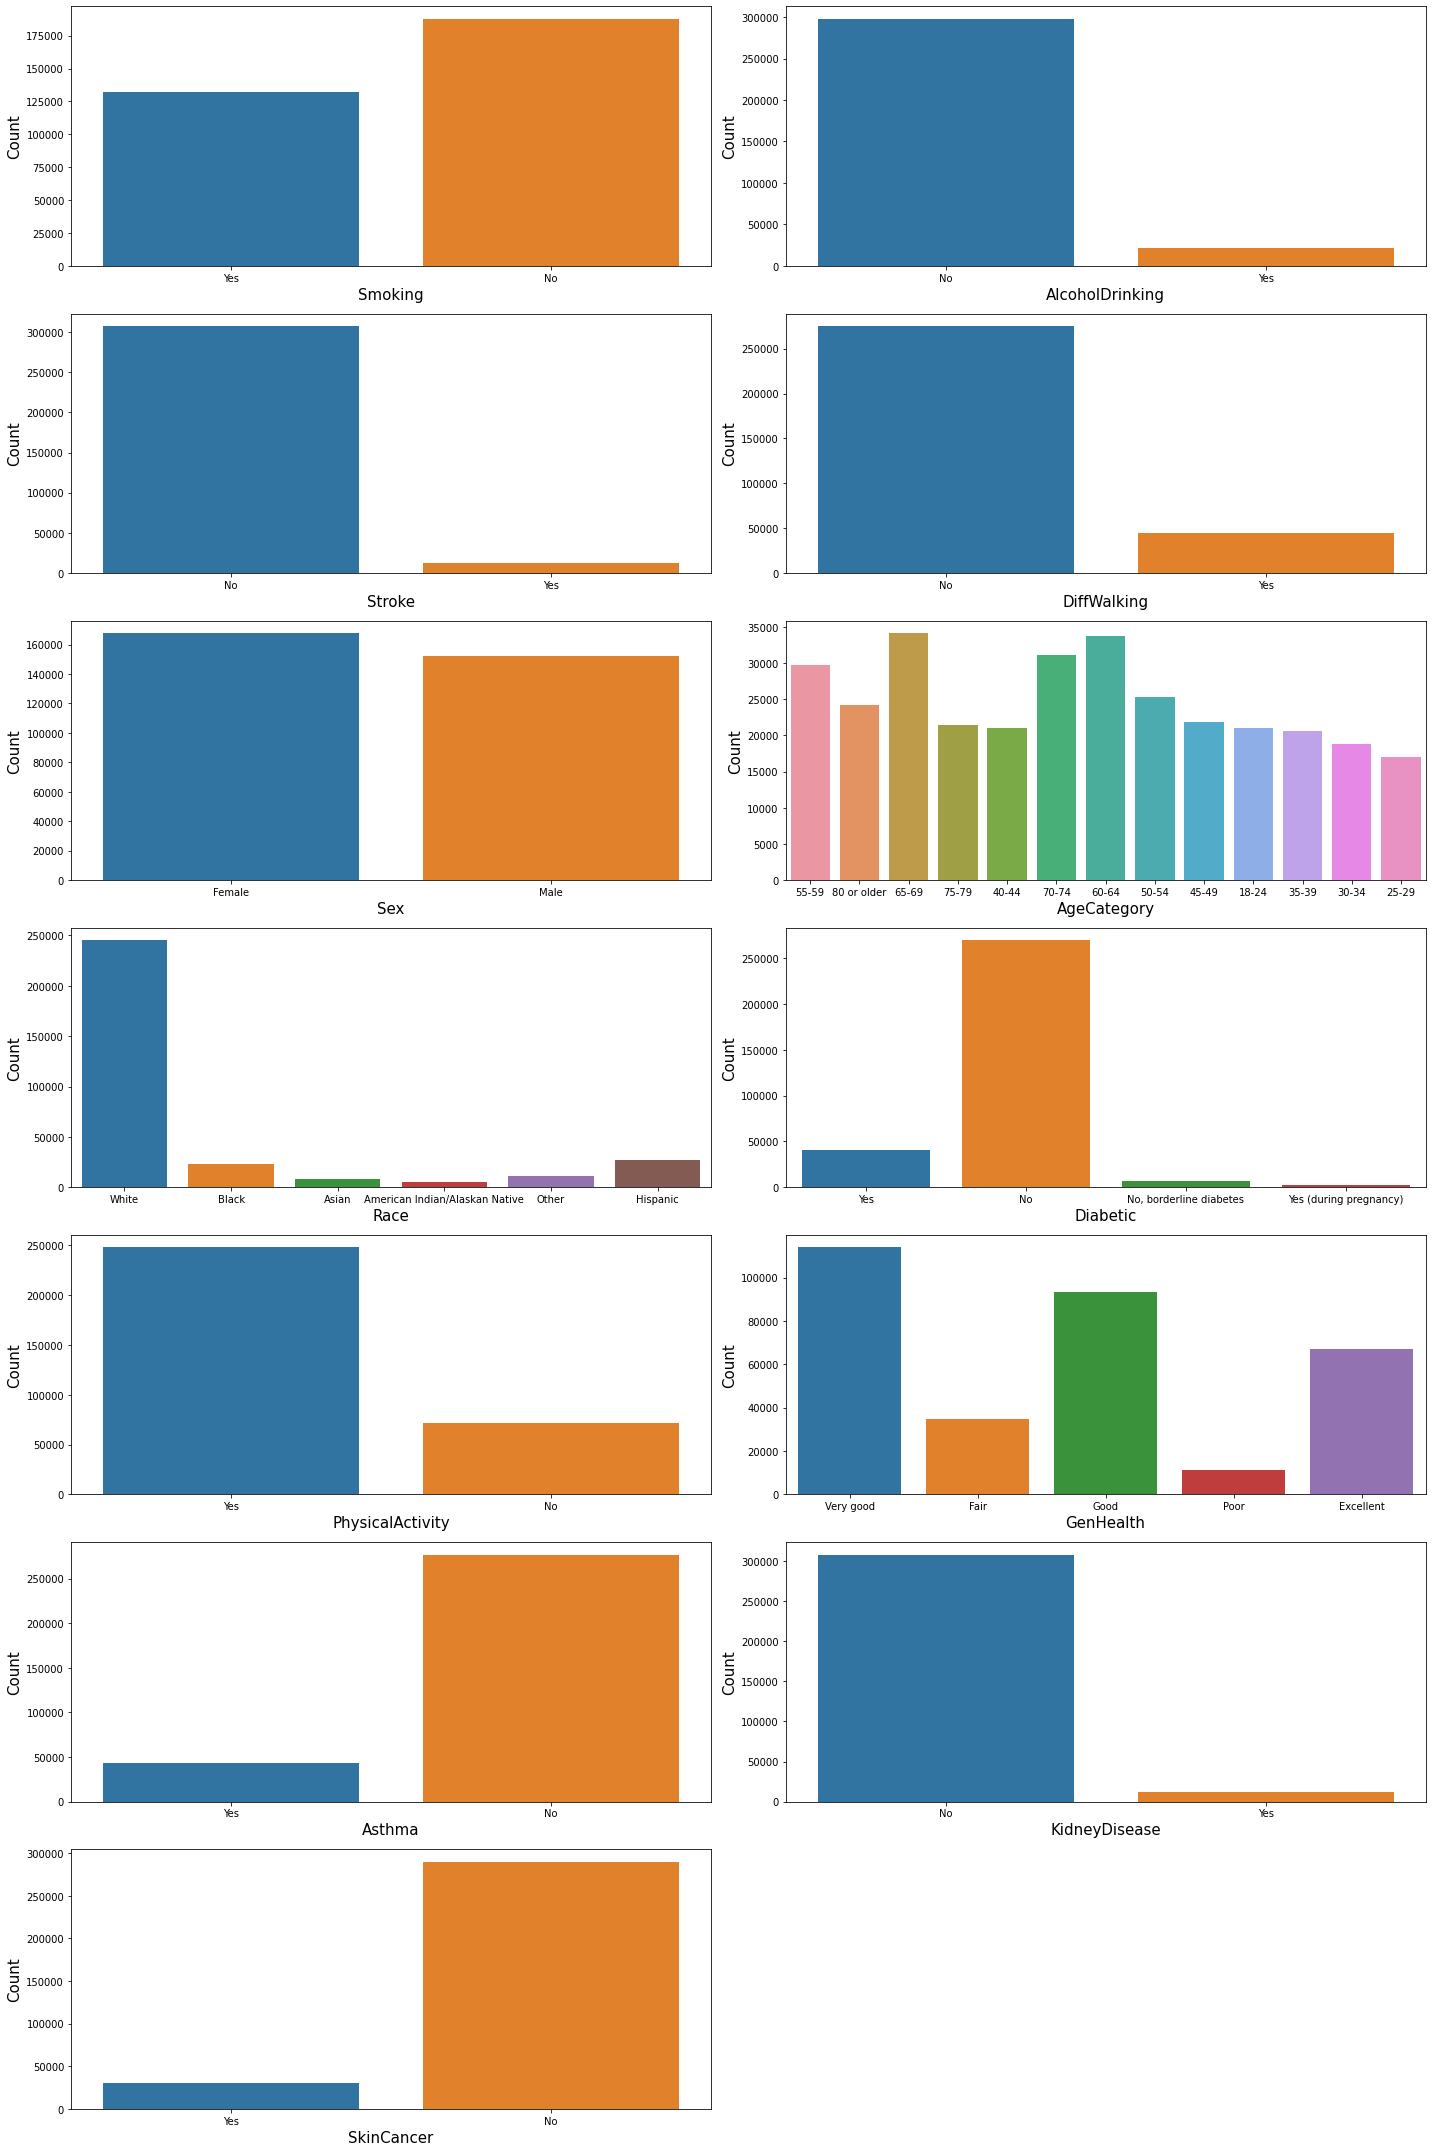

In [41]:
plt.figure(figsize=(20, 30))

for i, feature in enumerate(categorical_features):
    plt.subplot(7, 2, i+1)
    sns.countplot(x=feature, data=df, )
    plt.xticks(rotation=0)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel('Count', fontsize=15)

plt.tight_layout()
plt.show()

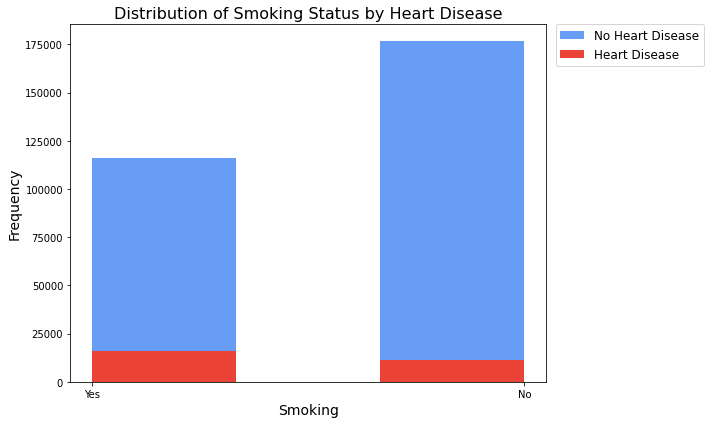

Percentage of smoker with heart disease in relation to all
Percentage of smoker with heart disease in relation to smokers


,HeartDisease
Smoking,
No,3.544771
Yes,5.014775
,HeartDisease
Smoking,
No,6.033414
Yes,12.157716


In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df[df["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("Smoking", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Smoking Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of smoker with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='Smoking', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['Smoking'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of smoker with heart disease in relation to smokers')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='Smoking', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='Smoking', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

* Among non-smokers, 3.54% of individuals have heart disease while among smokers, 5.01% of individuals have heart disease. This suggests that smoking may be a risk factor for heart disease, but the difference in percentages is not very large.
* Among individuals with heart disease, 6.03% are non-smokers while 12.16% are smokers. This suggests that smoking may be a risk factor for heart disease, as a higher percentage of smokers have heart disease compared to non-smokers.

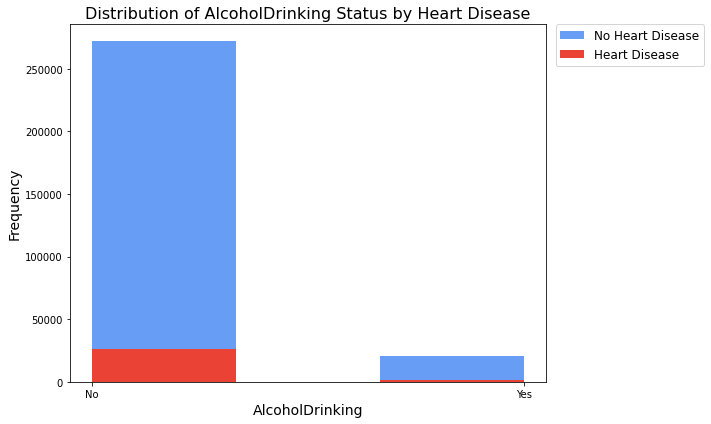

Percentage of alcohol drinker with heart disease in relation to all
Percentage of alcohol drinker with heart disease in relation to alcohol drinker


,HeartDisease
AlcoholDrinking,
No,8.202755
Yes,0.356791
,HeartDisease
AlcoholDrinking,
No,8.802153
Yes,5.239473


In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df[df["HeartDisease"]=='No']["AlcoholDrinking"], bins=3, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["AlcoholDrinking"], bins=3, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("AlcoholDrinking", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of AlcoholDrinking Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of alcohol drinker with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='AlcoholDrinking', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['AlcoholDrinking'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of alcohol drinker with heart disease in relation to alcohol drinker')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='AlcoholDrinking', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='AlcoholDrinking', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

The above results suggest that among all individuals with heart disease, a smaller proportion of them are alcohol drinkers (0.36%) compared to non-drinkers (8.20%). However, when considering only individuals who are alcohol drinkers, a higher percentage of them have heart disease (5.24%) compared to non-drinkers (8.80%).

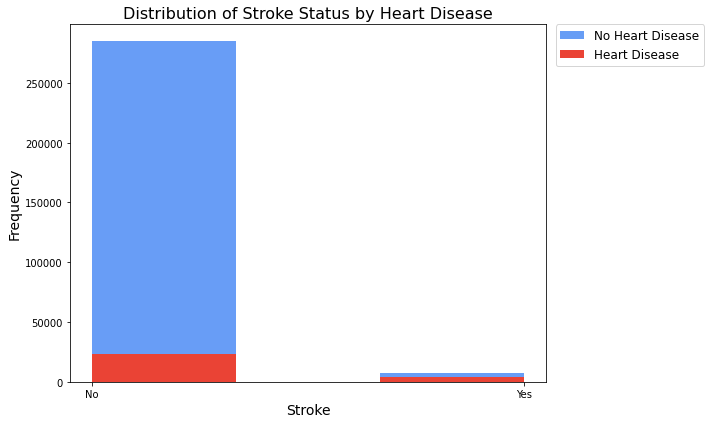

Percentage of people who had stroke with heart disease in relation to all
Percentage of people who had stroke with heart disease in relation to people who had stroke


,HeartDisease
Stroke,
No,7.187104
Yes,1.372442
,HeartDisease
Stroke,
No,7.468982
Yes,36.365896


In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df[df["HeartDisease"]=='No']["Stroke"], bins=3, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["Stroke"], bins=3, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("Stroke", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Stroke Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of people who had stroke with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='Stroke', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['Stroke'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of people who had stroke with heart disease in relation to people who had stroke')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='Stroke', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='Stroke', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

The above analysis shows that the percentage of people who had both heart disease and stroke in relation to all people is only 1.37%, while the percentage of people who had both heart disease and stroke in relation to people who had stroke is as high as 36.37%. This suggests that having a stroke significantly increases the likelihood of having heart disease as well.

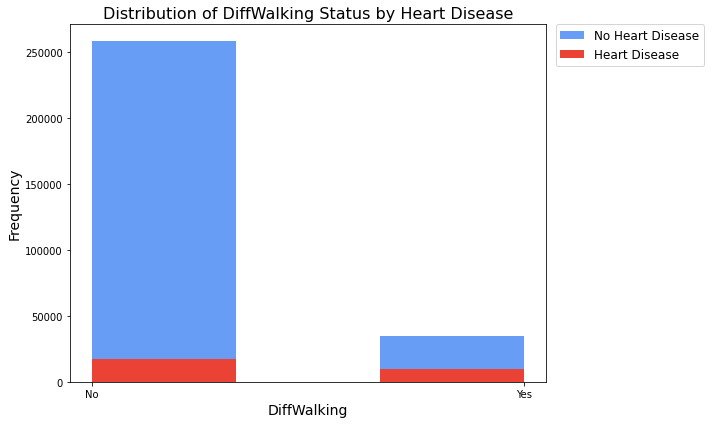

Percentage of people who have difficulty in Walking with heart disease in relation to all
Percentage of people who have difficulty in Walking with heart disease in relation to people who have difficulty in Walking


,HeartDisease
DiffWalking,
No,5.423787
Yes,3.135759
,HeartDisease
DiffWalking,
No,6.298455
Yes,22.580500


In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df[df["HeartDisease"]=='No']["DiffWalking"], bins=3, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["DiffWalking"], bins=3, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("DiffWalking", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of DiffWalking Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of people who have difficulty in Walking with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='DiffWalking', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['DiffWalking'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of people who have difficulty in Walking with heart disease in relation to people who have difficulty in Walking')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='DiffWalking', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='DiffWalking', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

Based on above results, individuals with heart disease have a higher percentage of difficulty in walking compared to individuals without heart disease. Specifically, around 22.6% of individuals who have difficulty in walking also have heart disease, while only 6.3% of individuals without difficulty in walking have heart disease. This indicates that having difficulty walking may be a risk factor for heart disease.

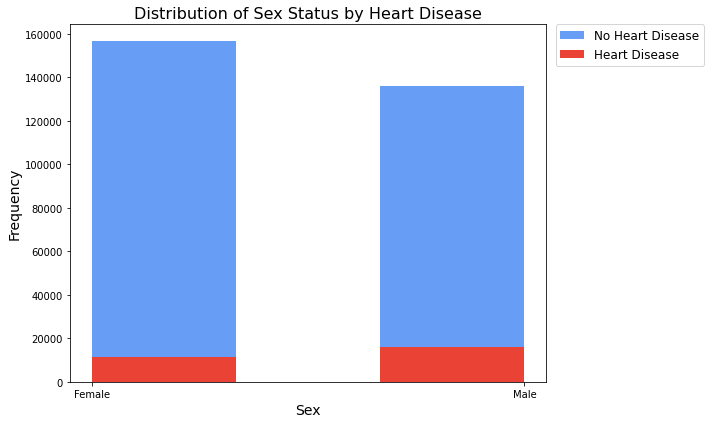

Percentage of sex with heart disease in relation to all
Percentage of sex with heart disease in relation to sex


,HeartDisease
Sex,
Female,3.512875
Male,5.046671
,HeartDisease
Sex,
Female,6.694675
Male,10.618462


In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df[df["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("Sex", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Sex Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of sex with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='Sex', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['Sex'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of sex with heart disease in relation to sex')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='Sex', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='Sex', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

From the above result values, we can see that the percentage of people with heart disease is higher among males (5.05%) compared to females (3.51%) in relation to all records. Similarly, when we consider only the records of males and females, the percentage of people with heart disease is much higher in males (10.62%) compared to females (6.69%). This suggests that males are at a higher risk of developing heart disease compared to females.

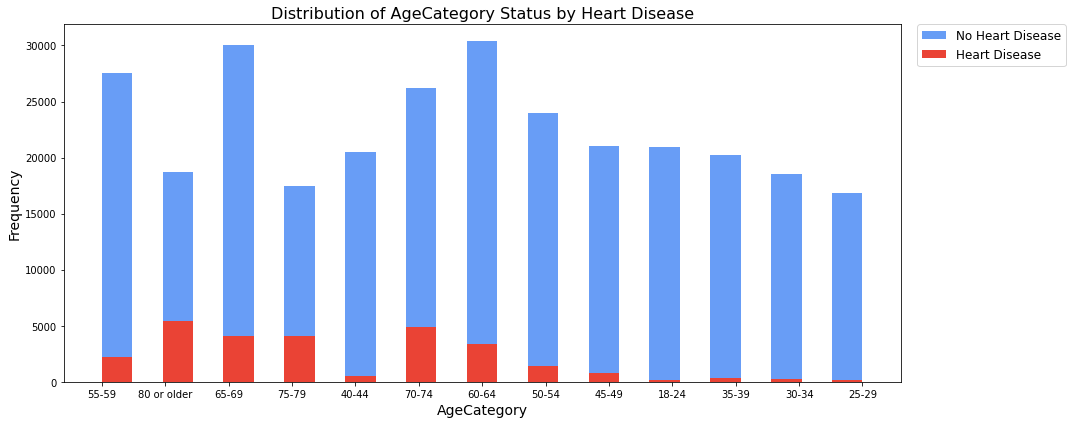

Percentage of AgeCategory with heart disease in relation to all
Percentage of AgeCategory with heart disease in relation to AgeCategory


,HeartDisease
AgeCategory,
18-24,0.040651
25-29,0.041589
30-34,0.070670
35-39,0.092559
40-44,0.151972
45-49,0.232649
50-54,0.432465
55-59,0.688566
60-64,1.040354


In [47]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(df[df["HeartDisease"]=='No']["AgeCategory"], bins=25, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["AgeCategory"], bins=25, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("AgeCategory", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of AgeCategory Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of AgeCategory with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='AgeCategory', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['AgeCategory'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of AgeCategory with heart disease in relation to AgeCategory')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='AgeCategory', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='AgeCategory', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

The above pivot tables show that the percentage of individuals with heart disease is higher in older age groups. When considering the percentage of heart disease cases in relation to all cases, individuals aged 70 or older have the highest percentage of heart disease cases, followed by those aged 65-69 and 75-79. When considering the percentage of heart disease cases in relation to the total number of individuals in each age group, the highest percentage of heart disease cases is observed in individuals aged 80 or older, followed by those aged 75-79 and 70-74. These findings suggest that age is an important factor in the development of heart disease, with older individuals being at a higher risk of developing the disease.

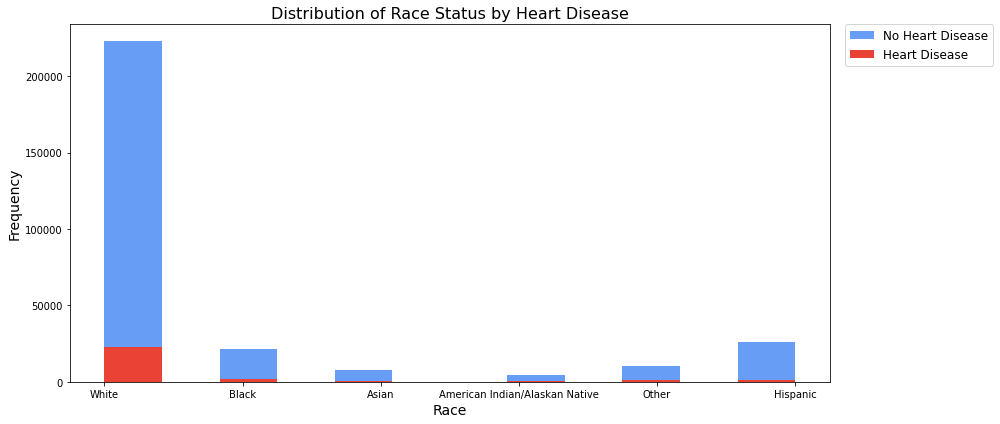

Percentage of Race with heart disease in relation to all
Percentage of Race with heart disease in relation to Race


,HeartDisease
Race,
American Indian/Alaskan Native,0.169484
Asian,0.083178
Black,0.540659
Hispanic,0.451227
Other,0.277052
White,7.037946
,HeartDisease
Race,
American Indian/Alaskan Native,10.419070


In [48]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.hist(df[df["HeartDisease"]=='No']["Race"], bins=12, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["Race"], bins=12, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Race Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of Race with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='Race', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['Race'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of Race with heart disease in relation to Race')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='Race', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='Race', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

From the above results, we can see that the White race has a significantly higher percentage of individuals with heart disease in both absolute terms (7.04%) and relative to their overall population (9.18%). Black individuals also have a higher percentage of heart disease in relation to their population (7.54%), but the percentage in absolute terms is lower than that of White individuals (0.54%). The other races have a much lower percentage of heart disease in both absolute and relative terms. However, it's important to note that the sample size for each race is not equal.

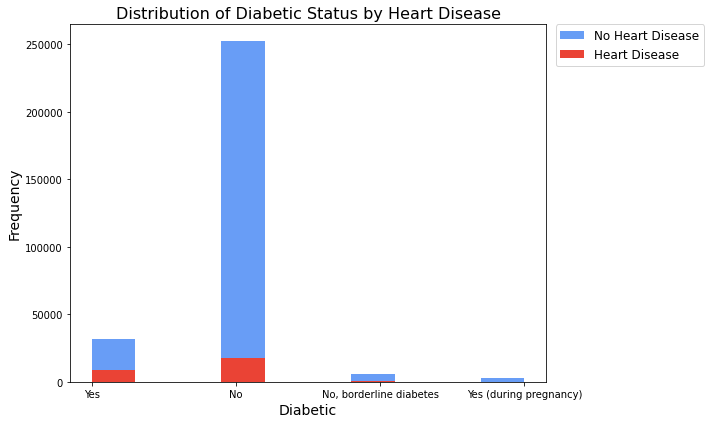

Percentage of people with diabetic history with heart disease in relation to all
Percentage of people with diabetic history with heart disease in relation to people with diabetic history


,HeartDisease
Diabetic,
No,5.478197
"No, borderline diabetes",0.246721
Yes,2.800857
Yes (during pregnancy),0.033772
,HeartDisease
Diabetic,
No,6.496868
"No, borderline diabetes",11.635452
Yes,21.952355


In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df[df["HeartDisease"]=='No']["Diabetic"], bins=10, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["Diabetic"], bins=10, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("Diabetic", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Diabetic Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of people with diabetic history with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='Diabetic', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['Diabetic'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of people with diabetic history with heart disease in relation to people with diabetic history')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='Diabetic', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='Diabetic', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

From the pivot table, we can say that the percentage of people with heart disease who have a history of diabetes is relatively low, with only 2.8% of individuals with diabetes having heart disease. However, when looking at the second perspective, we can see that among people with a history of diabetes, a relatively large proportion (21.9%) have heart disease. This suggests that having diabetes is a significant risk factor for heart disease. Additionally, the percentage of individuals with borderline diabetes who have heart disease is also relatively high (11.6%), which indicates that even borderline diabetes is associated with an increased risk of heart disease.

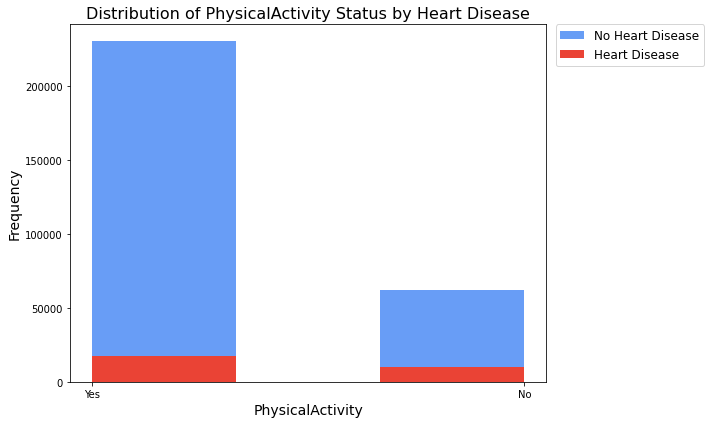

Percentage of people who does PhysicalActivity with heart disease in relation to all
Percentage of people who does PhysicalActivity history with heart disease in relation to people with PhysicalActivity


,HeartDisease
PhysicalActivity,
No,3.090730
Yes,5.468816
,HeartDisease
PhysicalActivity,
No,13.758735
Yes,7.053239


In [50]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df[df["HeartDisease"]=='No']["PhysicalActivity"], bins=3, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["PhysicalActivity"], bins=3, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("PhysicalActivity", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of PhysicalActivity Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of people who does PhysicalActivity with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='PhysicalActivity', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['PhysicalActivity'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of people who does PhysicalActivity history with heart disease in relation to people with PhysicalActivity')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='PhysicalActivity', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='PhysicalActivity', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

From the first pivot table, it can be observed that people who do physical activity have a higher percentage of heart disease compared to those who do not. However, from the second pivot table, it can be observed that the percentage of people with heart disease is higher among those who do not do physical activity compared to those who do. This indicates that physical activity may have a protective effect against heart disease.

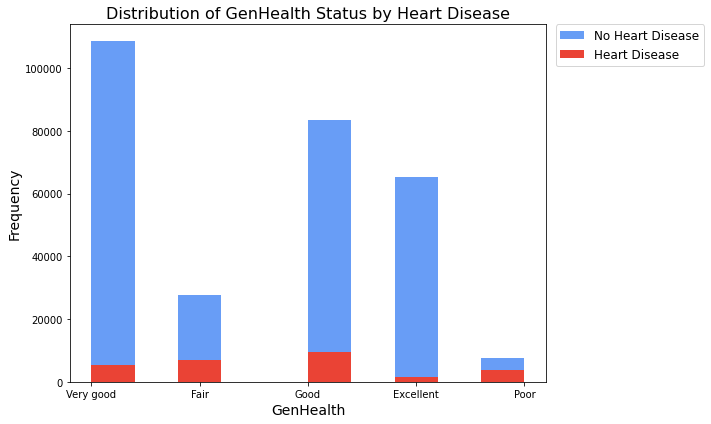

Percentage of people who does GenHealth with heart disease in relation to all
Percentage of people who does GenHealth history with heart disease in relation to people with GenHealth


,HeartDisease
GenHealth,
Excellent,0.469050
Fair,2.215169
Good,2.988790
Poor,1.203896
Very good,1.682640
,HeartDisease
GenHealth,
Excellent,2.244098
Fair,20.428526


In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df[df["HeartDisease"]=='No']["GenHealth"], bins=10, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["GenHealth"], bins=10, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("GenHealth", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of GenHealth Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of people who does GenHealth with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='GenHealth', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['GenHealth'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of people who does GenHealth history with heart disease in relation to people with GenHealth')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='GenHealth', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='GenHealth', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

From the first pivot table, it can be seen that people who report fair and good general health have a higher percentage of heart disease compared to those who report excellent or very good general health. From the second pivot table, it can be seen that people who report poor general health have the highest percentage of heart disease, followed by those who report fair general health.

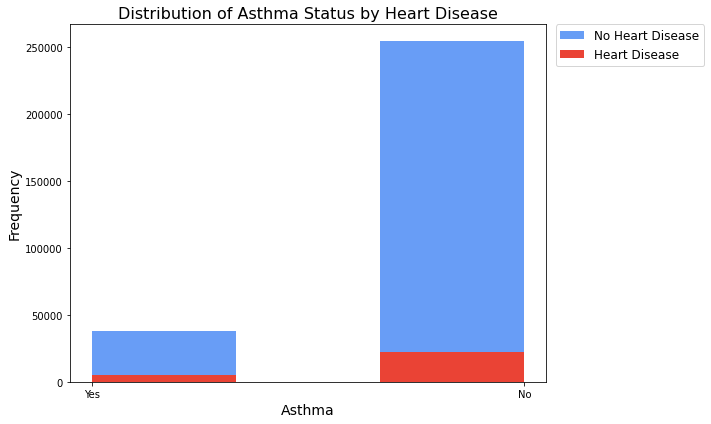

Percentage of people who have Asthma with heart disease in relation to all
Percentage of people who have Asthma history with heart disease in relation to people with Asthma


,HeartDisease
Asthma,
No,7.016995
Yes,1.542551
,HeartDisease
Asthma,
No,8.103336
Yes,11.506344


In [52]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df[df["HeartDisease"]=='No']["Asthma"], bins=3, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["Asthma"], bins=3, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("Asthma", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Asthma Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of people who have Asthma with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='Asthma', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['Asthma'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of people who have Asthma history with heart disease in relation to people with Asthma')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='Asthma', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='Asthma', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

From the tables, we can observe that a lower percentage of individuals with Asthma have heart disease in relation to all individuals (1.54%) compared to those without Asthma (7.02%). However, when we look at the percentage of people with heart disease among only those with Asthma, the percentage is higher (11.51%) compared to those without Asthma (8.10%). Therefore, we can conclude that Asthma may be a risk factor for heart disease. 

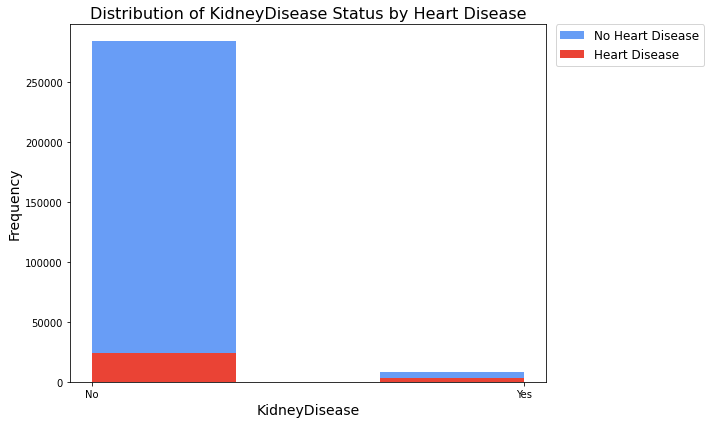

Percentage of people who have KidneyDisease with heart disease in relation to all
Percentage of people who have KidneyDisease history with heart disease in relation to people who have KidneyDisease


,HeartDisease
KidneyDisease,
No,7.479166
Yes,1.080380
,HeartDisease
KidneyDisease,
No,7.765181
Yes,29.331862


In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df[df["HeartDisease"]=='No']["KidneyDisease"], bins=3, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["KidneyDisease"], bins=3, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("KidneyDisease", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of KidneyDisease Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of people who have KidneyDisease with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='KidneyDisease', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['KidneyDisease'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of people who have KidneyDisease history with heart disease in relation to people who have KidneyDisease')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='KidneyDisease', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='KidneyDisease', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

From the first pivot table, we can see that out of all the people who have heart disease, only 1.08% have a history of kidney disease, while the majority (7.48%) have no history of kidney disease. However, the second pivot table shows that out of all the people who have a history of kidney disease, a significant proportion (29.33%) also have heart disease. This suggests that there may be a strong association between Kidney Disease and Heart Disease.

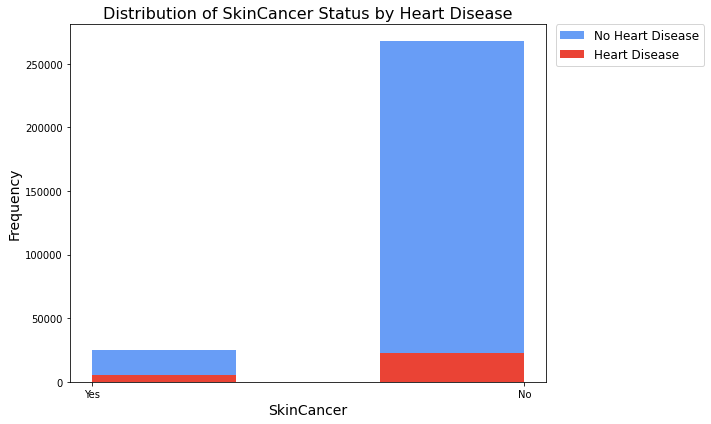

Percentage of people who have SkinCancer with heart disease in relation to all
Percentage of people who have SkinCancer history with heart disease in relation to people who have SkinCancer


,HeartDisease
SkinCancer,
No,7.002298
Yes,1.557248
,HeartDisease
SkinCancer,
No,7.722363
Yes,16.700761


In [54]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df[df["HeartDisease"]=='No']["SkinCancer"], bins=3, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(df[df["HeartDisease"]=='Yes']["SkinCancer"], bins=3, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("SkinCancer", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of SkinCancer Status by Heart Disease", fontsize=16)

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=12)

plt.tight_layout()
plt.show()

print('Percentage of people who have SkinCancer with heart disease in relation to all')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='SkinCancer', aggfunc='count', values='HeartDisease')['HeartDisease'] / df['SkinCancer'].count() * 100
_pivot_1 =  pd.DataFrame(_).style.background_gradient(cmap='BuPu')

print('Percentage of people who have SkinCancer history with heart disease in relation to people who have SkinCancer')
_ = pd.pivot_table(df[df['HeartDisease'] == 'Yes'], index='SkinCancer', aggfunc='count', values='HeartDisease')['HeartDisease'] / pd.pivot_table(df, index='SkinCancer', aggfunc='count', values='HeartDisease')['HeartDisease'] * 100
_pivot_2 = pd.DataFrame(_).style.background_gradient(cmap='BuPu')

multi_table([_pivot_1, _pivot_2])

The first table indicates that out of all individuals with heart disease, only 1.56% have a history of Skin Cancer. The second table indicates that out of all individuals with Skin Cancer, 16.7% have a history of heart disease. This suggests that there may be a possible association between Skin Cancer and heart disease

In [55]:
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']

In [56]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df_enc = encoder.fit_transform(df[categorical_features].iloc[:,:])
df_enc = pd.DataFrame(df_enc, columns=df[categorical_features].columns.tolist()[:])

In [57]:
new_df = pd.concat([df_enc, df[numeric_features]], axis=1)

<AxesSubplot:>

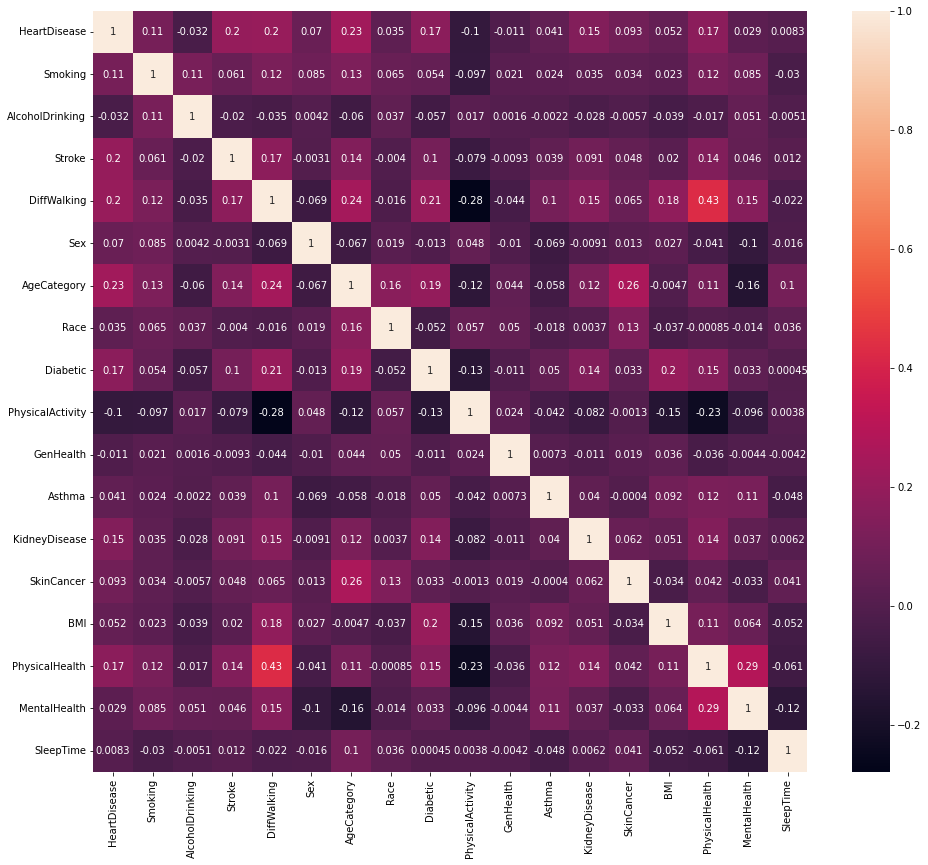

In [58]:
fig = plt.figure(figsize=(16,14))
sns.heatmap(new_df.corr(), annot=True)

Based on the analysis of the given data, it can be inferred that heart disease is not solely caused by any one factor, but rather by a combination of multiple risk factors. Factors such as Smoking, Stroke, DiffWalking, Diabetic, KidneyDisease, and Age have been observed to have a significant correlation with heart disease. On the other hand, BMI, AlcoholDrinking, PhysicalHealth, MentalHealth, Sex, Race, PhysicalActivity, GenHealth, SleepTime, SkinCancer, and Asthma appear to have a moderate to weak correlation with heart disease. Therefore, We will visualize combination of factors that may lead to heart disease.

In [59]:
dk = df.copy()
dk.Smoking = dk.Smoking.apply(lambda x : 'Smoking' if x == 'Yes' else 'Non Smoking')
dk.Stroke = dk.Stroke.apply(lambda x : 'Stroke' if x == 'Yes' else 'No Stroke')
dk.DiffWalking = dk.DiffWalking.apply(lambda x : 'DiffWalking' if x == 'Yes' else 'No DiffWalking')
dk.Diabetic = dk.Diabetic.apply(lambda x : 'Diabetic' if x == 'Yes' else 'No Diabetic')
dk.KidneyDisease = dk.KidneyDisease.apply(lambda x : 'KidneyDisease' if x == 'Yes' else 'No KidneyDisease')
dk.SkinCancer = dk.SkinCancer.apply(lambda x : 'SkinCancer' if x == 'Yes' else 'No SkinCancer')

In [60]:
dk['group'] = dk.Smoking + ' & ' + dk.Stroke + ' & ' + dk.DiffWalking + ' & ' + dk.Diabetic + ' & ' + dk.KidneyDisease + ' & ' + dk.SkinCancer

In [61]:
df_plot = dk.groupby('group')['HeartDisease'].value_counts(normalize = True).mul(100)
df_plot = df_plot.rename('percent').reset_index()

In [62]:
h = df_plot[df_plot['HeartDisease']=='Yes'].drop(['HeartDisease'],axis=1)
h.set_index('group',inplace=True)
h = h.sort_values('percent', ascending=False)

In [63]:
k = df_plot.iloc[[93,31,21,13,25,61,98,42,96,100,3,59,83]]
k = k.sort_values('percent', ascending=False)

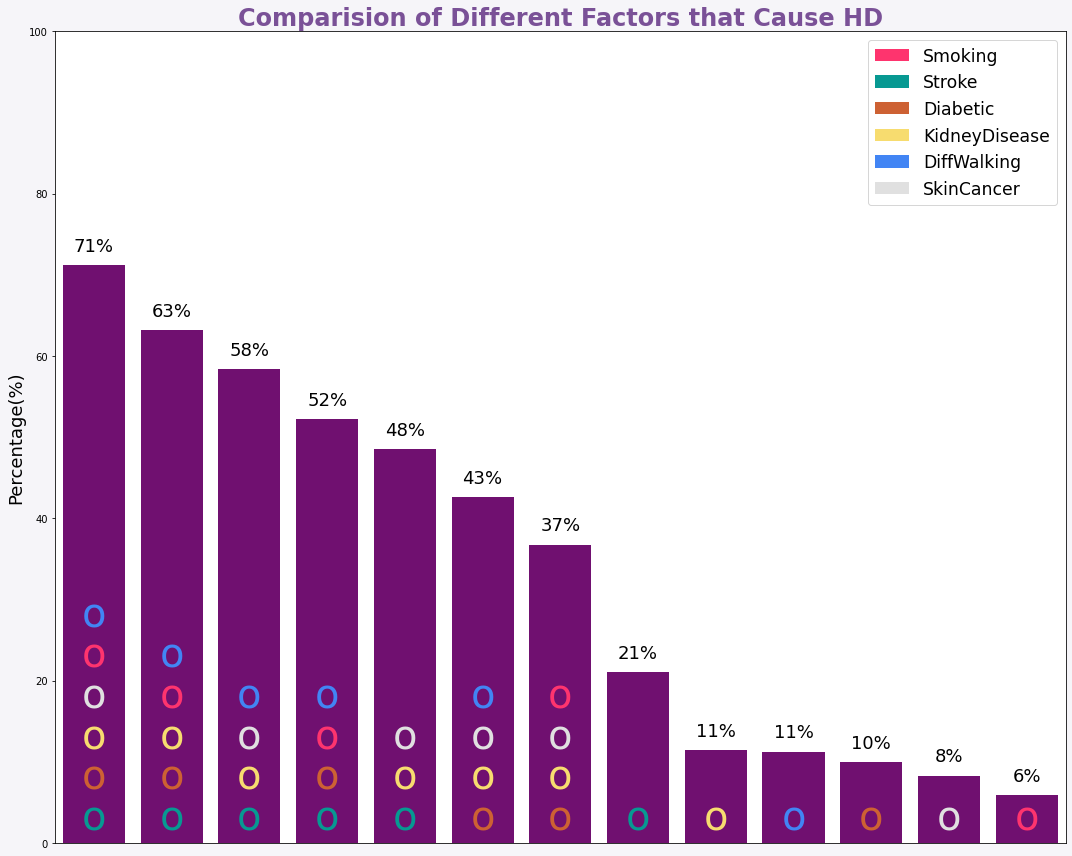

In [64]:
fig, ax = plt.subplots(1, 1,figsize =(15, 12), facecolor='#f6f5f9')
ax = sns.barplot(y=k.percent.values, x=k.group, color='#800080')
ax.bar_label(ax.containers[0], fmt='%.0f%%', padding=10, fontsize=18)
colors={
    'Smoking':'#fe346e',
    'Stroke':'#079992',
    'Diabetic':'#cd6133',
    'KidneyDisease':'#F7DC6F',
    'DiffWalking':'#4285f4',
    'SkinCancer':'#E0E0E0'
}
factors=[['Stroke', 'Diabetic', 'KidneyDisease', 'SkinCancer', 'Smoking', 'DiffWalking'],
    ['Stroke', 'Diabetic', 'KidneyDisease', 'Smoking', 'DiffWalking'],
    ['Stroke', 'KidneyDisease', 'SkinCancer', 'DiffWalking'],
    ['Stroke', 'Diabetic', 'Smoking', 'DiffWalking'],
    ['Stroke', 'KidneyDisease', 'SkinCancer'],
    ['Diabetic', 'KidneyDisease', 'SkinCancer', 'DiffWalking'],
    ['Diabetic', 'KidneyDisease', 'SkinCancer', 'Smoking'],
    ['Stroke'],
    ['KidneyDisease'],
    ['DiffWalking'],
    ['Diabetic'],
    ['SkinCancer'],
    ['Smoking']
]
x=0
marker = 'o'
for fct in factors:
    y=3
    for i in fct:
        ax.annotate(marker, ha='center', va='center', fontsize=40, color=colors[i], xy=(x, y))
        y+= 5
    x+=1
    
ax.set_ylabel('Percentage(%)', fontsize=18)
ax.axes.get_xaxis().set_visible(False)
ax.set(ylim=(0, 100))
ax.set_title('Comparision of Different Factors that Cause HD', fontsize=24, color='#7A5197', fontweight='bold')

legend_elements = [patches.Patch(facecolor=color, label=label) for label, color in colors.items()]
ax.legend(handles=legend_elements, fontsize = 'xx-large', )
plt.tight_layout()
plt.show()


## Key Observations:

Based on the analysis of above data we can conclude that, 

* No single factor signals red light for heart disease, but multiple factors are responsible to put person on risk of heart disease.

* Each history of stroke(21%), history of kidney disease(11%) and difficulty in walking(11%) are potential sign of heart disease.

* A person with combination of stroke, kidney disease, skin cancer and diffculty in walking have 58% chance of having heart disease which significantly high.

* A person with habits of smoking, diabetes, history of stroke & kidney disease, difficulty in walking and having skin cancer have 71% chance of heart disease.

* People older than 60 prone to risk of heart disease than those younger than 60.

* In terms of sexes, males tend to have a higher chance of heart disease than females.

* BMI, AlcoholDrinking, PhysicalHealth, MentalHealth, Race, PhysicalActivity, GenHealth, SleepTime, and Asthma appear to have a moderate to weak correlation with heart disease.



## Key Observations:

Based on the analysis of above data we can infer that,

* No single factor is a clear indicator of heart disease risk, but multiple factors can increase the risk.
* Having a history of stroke, kidney disease, or difficulty walking are potential signs of heart disease.
* People with a combination of stroke, kidney disease, skin cancer, and difficulty walking have a significantly higher risk of heart disease.
* People who smoke, have diabetes, a history of stroke and kidney disease, difficulty walking, and skin cancer have a very high risk of heart disease.
* Older people (60+) are more prone to heart disease than younger people.
* Males tend to have a higher risk of heart disease than females.
* Certain factors, such as BMI, alcohol drinking, physical and mental health, race, physical activity, general health, sleep time, and asthma, have a moderate to weak correlation with heart disease.

In conclusion, the analysis highlights the importance of considering multiple risk factors when assessing the likelihood of heart disease. While certain indicators such as a history of stroke, kidney disease, and difficulty in walking can signal potential risk, it is the combination of these factors that significantly increases the likelihood of heart disease. Surprisingly, some commonly accepted risk factors, such as BMI and physical activity, were found to have only a moderate to weak correlation with heart disease.